# 1.Vue globale 3 ans 

## Importation des bibliothèques

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Charte graphique

In [19]:
# Couleurs principales
MINI_BLUE = '#607D8B'    
MINI_GREEN = '#A5D6A7'   
MINI_GRAY = '#9E9E9E'    

MANDARINE = '#FF9800'    
SOFT_ORANGE = '#FFC107'  
BLEU_CANARD = '#00796B'     
WINE = '#880E4F'  

# fond et lignes de structure
LIGHT_GRID = '#EDEDED' 
BG_WHITE = '#FFFFFF'     
LIGHT_GRAY = '#BDBDBD'

def set_minimalist_style():
    """Applique le style graphique 'Minimaliste 2025' pour la clarté."""
    
    # 1. Utiliser le thème 'white' de Seaborn
    sns.set_theme(style="white") 
    
    # Définir la nouvelle séquence de couleurs complète (7 couleurs)
    FULL_COLOR_CYCLE = [
        MINI_BLUE,
        MINI_GREEN,
        MINI_GRAY,
        MANDARINE, 
        SOFT_ORANGE, 
        BLEU_CANARD,
        WINE
    ]
    
    # 2. Modifier les paramètres globaux (rcParams)
    plt.rcParams.update({
        
        # --- FOND ET CADRE ---
        'figure.facecolor': BG_WHITE,
        'axes.facecolor': BG_WHITE,
        'axes.edgecolor': LIGHT_GRAY, 
        'axes.linewidth': 0.5,
        
        # --- GRILLE ---
        'axes.grid': True,
        'grid.color': LIGHT_GRID,
        'grid.linestyle': '-',
        'grid.linewidth': 0.7,
        
        # --- TYPOGRAPHIE ET LABELS ---
        'font.family': 'sans-serif',
        'axes.titlesize': 18,
        'axes.labelsize': 11,
        'legend.frameon': False,
        
        # --- LIGNES ET PALETTE ---
        'lines.linewidth': 1.8,
        # Définition du cycle de 7 couleurs pour Matplotlib
        'axes.prop_cycle': plt.cycler('color', FULL_COLOR_CYCLE) 
    })
    
    # 3. Appliquer également la palette de 7 couleurs à Seaborn
    sns.set_palette(FULL_COLOR_CYCLE)

set_minimalist_style()

## Importation des données

In [24]:
df_vue_globale = pd.read_csv(r"../1.Donnees\3.Exports_csv\1.analyse_descriptive\1.3.analyse_temporelle\1.3.1.variations_yoy.csv")
df_vue_globale.sample(10)

,annee,mois,volume_total_var_yoy,ca_total_var_yoy,marge_brute_var_yoy,panier_moyen_var_yoy
7,2022,8,NaN,NaN,NaN,NaN
9,2022,10,NaN,NaN,NaN,NaN
18,2023,7,3.01,6.53,6.09,1.53
34,2024,11,10.57,13.67,12.94,3.78
6,2022,7,NaN,NaN,NaN,NaN
2,2022,3,NaN,NaN,NaN,NaN
14,2023,3,5.64,6.77,6.78,1.22
8,2022,9,NaN,NaN,NaN,NaN
30,2024,7,11.34,1.24,2.62,-6.95
29,2024,6,14.64,19.54,17.92,5.52


## Préparation des données

In [21]:
# --- Préparation des Données Temporelles pour l'Analyse des Séries ---

# Construction de la clé temporelle complète au format 'AAAA-MM' pour assurer la cohérence
# Nécessite la conversion explicite des colonnes 'annee' et 'mois' en type string pour la concaténation.
df_vue_globale['date'] = df_vue_globale['annee'].astype(str) + '-' + df_vue_globale['mois'].astype(str)

# Conversion de la nouvelle colonne composite en objet datetime pour permettre les opérations de séries temporelles.
df_vue_globale['date_complete'] = pd.to_datetime(df_vue_globale['date']) 

# Finalisation du DataFrame en retirant les colonnes d'origine (annee, mois) et les clés intermédiaires, 
# ainsi que la variable non pertinente 'panier_moyen_var_yoy' à ce stade de l'analyse.
df_vue_globale = df_vue_globale.drop(columns=['date', 'annee', 'mois', 'panier_moyen_var_yoy'])

# Définition de l'index temporel sur 'date_complete'. 
# Cette étape est cruciale pour faciliter les agrégations futures et les visualisations basées sur le temps.
df_vue_globale = df_vue_globale.set_index(['date_complete'])

# Affichage d'un échantillon pour vérification
df_vue_globale.sample(10)

,volume_total_var_yoy,ca_total_var_yoy,marge_brute_var_yoy
date_complete,,,
2023-02-01,3.97,9.72,8.74
2023-08-01,4.02,6.93,5.69
2024-05-01,8.52,13.00,11.87
2022-07-01,NaN,NaN,NaN
2024-10-01,-0.13,0.14,0.31
2022-05-01,NaN,NaN,NaN
2023-11-01,5.63,4.49,5.16
2023-04-01,10.59,2.49,4.19
2023-09-01,6.67,11.26,10.66


## Visualisation

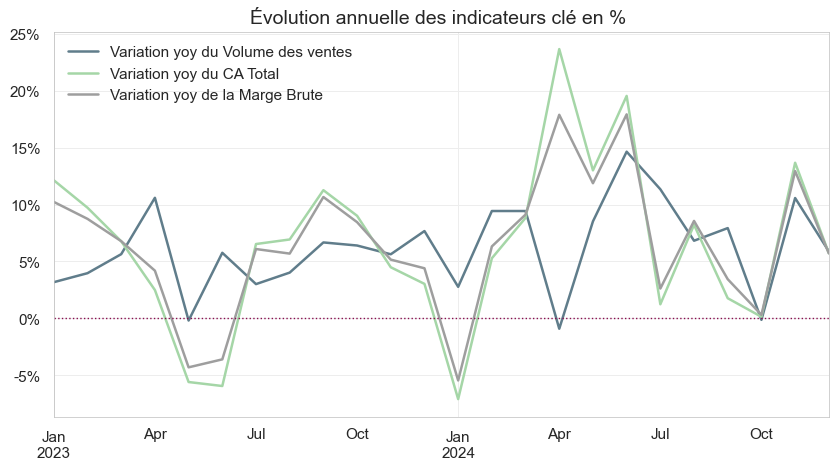

In [22]:
# --- Visualisation de la Tendance Annuelle (Year-over-Year - YOY) ---

# Génération initiale du graphique linéaire à partir du DataFrame préparé.
# La fonction .plot() utilise l'index 'date_complete' défini précédemment pour l'axe X.
ax = df_vue_globale.plot(figsize=(10, 5))

# Mise à jour manuelle des légendes pour améliorer la clarté et l'ordre des indicateurs affichés.
# Cette étape remplace les noms de colonnes bruts par des étiquettes descriptives.
nouvelles_etiquettes = ['Variation yoy du Volume des ventes', 'Variation yoy du CA Total', 'Variation yoy de la Marge Brute'] 
ax.legend(labels=nouvelles_etiquettes)

# Paramétrage formel du titre et des limites d'affichage.
plt.title("Évolution annuelle des indicateurs clé en % ", fontsize = 14)
# Définition des limites temporelles pour se concentrer sur la période d'analyse 2023-2024.
plt.xlim('2023-01-01', '2024-12-31')

# Ajout d'une ligne de référence horizontale à y=0. 
# Cette ligne est cruciale pour identifier visuellement les périodes de croissance (au-dessus) 
# et les périodes de contraction (en dessous).
ax.axhline(0, color=WINE, linestyle=':', linewidth=1) 

# Récupération de l'objet Axes pour les modifications fines.
ax = plt.gca()
# Suppression de l'étiquette de l'axe X, l'index étant déjà lisible.
ax.set_xlabel('')
# Formatage de l'axe Y pour afficher les valeurs en pourcentage (%).
# Utilisation d'une fonction lambda simple pour garantir une décimale entière.
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,_: f"{y:.0f}%"))